In [9]:
import os, fucoes_extras #Funcoes de diretorio e funcoes extras
from sklearn.model_selection import KFold #Importando KFold Cross Validation
import pandas as pd #Importando o pandas (leitor e escritor de arquivos)
from numpy import genfromtxt #Leitor de .csv e conversor p/ array numpy
from os import listdir #Importando buscador de arquivos
from machine_learn import svm_andre, rna_mlp #Importando SVM e RNA
import statistics
import numpy as np

In [10]:
diretorio= os.getcwd()+"/dados_csv/" #Busca o diretorio automaticamente

#Parametros p/ SVM
C= 1.0
gamma= 'scale'
kernel= 'rbf'

#Parametros p/ RNA
max_iter=300
hidden_layer_sizes= (100,) #Testar (50, 50) e (100, 100)
learning_rate= 'constant'
learning_rate_init= 0.01

In [11]:
acur_RNA= []
acur_SVM= []

acurB_RNA= []
acurB_SVM= []

matrizC_RNA= []
matrizC_SVM= []

media_SVM= []
des_SVM= []
media_RNA= []
des_RNA= []

mediaB_SVM= []
desB_SVM= []
mediaB_RNA= []
desB_RNA= []

matrizC_R= []
matrizC_S= []

extractor_name= []

In [12]:
KF= KFold(n_splits=10, random_state=13, shuffle=True) #(n_folds, semente, ordenacao)

for nome in listdir(diretorio):
    dados= genfromtxt((diretorio+nome), delimiter=',',skip_header=1)

    classCol = dados.shape[1] - 1
    y = dados[:,classCol]
    x = dados[:, :(classCol-1)]
    
    KF_data = pd.DataFrame(KF.split(x)) #Lendo os valores p/ exportacao em .csv
    KF_data.to_csv('kfolds_data.csv') #Salvando em .csv
    
    for train_index, test_index in KF.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Treinando e avaliando o desempenho da SVM
        S= svm_andre.SVM(x_train, y_train, x_test, y_test, C, gamma, kernel)
        acur_SVM.append(S[0]) #Lista de acuracias de todos os folds
        acurB_SVM.append(S[1]) #Lista de acuracias balanceadas de todos os folds
        matrizC_SVM.append(S[2]) #Lista de matrizes de confusao de todos os folds
        
        #Treinando e avaliando o desempenho da RNA
        R= rna_mlp.RNAs(x_train, y_train, x_test, y_test, learning_rate_init,
                        learning_rate, hidden_layer_sizes, max_iter)
        acur_RNA.append(R[0]) #Lista de acuracias de todos os folds
        acurB_RNA.append(R[1]) #Lista de acuracias balanceadas de todos os folds
        matrizC_RNA.append(R[2]) #Lista de matrizes de confusao de todos os folds
    
    media_SVM.append(statistics.mean(acur_SVM))
    des_SVM.append(statistics.stdev(acur_SVM))
    media_RNA.append(statistics.mean(acur_RNA))
    des_RNA.append(statistics.stdev(acur_RNA))
    
    mediaB_SVM.append(statistics.mean(acurB_SVM))
    desB_SVM.append(statistics.stdev(acurB_SVM))
    mediaB_RNA.append(statistics.mean(acurB_RNA))
    desB_RNA.append(statistics.stdev(acurB_RNA))
    
    matrizC_S.append(np.sum(matrizC_SVM, axis=0))
    matrizC_R.append(np.sum(matrizC_RNA, axis=0))
    
    extractor_name.append(nome[:-4])

In [35]:
print("\033[1mMatrizes de confusao\033[0m\n")

for i in range(0,len(extractor_name)):
    print('\033[1m___'+extractor_name[i]+'\033[0m', "\n\nSVM")
    fucoes_extras.imprime_matriz(matrizC_S[i])
    print("RNA")
    fucoes_extras.imprime_matriz(matrizC_R[i])

Matrizes de confusao

___glcm 

SVM
144	0	0
0	177	0
0	7	46

RNA
144	0	0
1	163	13
0	30	23

___hog 3cells 

SVM
288	0	0
1	352	1
0	8	98

RNA
285	3	0
3	330	21
0	33	73

___lbp 

SVM
432	0	0
2	527	2
0	9	150

RNA
422	10	0
19	426	86
0	52	107

___hog 

SVM
576	0	0
3	702	3
0	10	202

RNA
565	11	0
19	598	91
0	54	158

___glcm e hog 

SVM
720	0	0
3	879	3
0	17	248

RNA
709	11	0
19	770	96
0	58	207



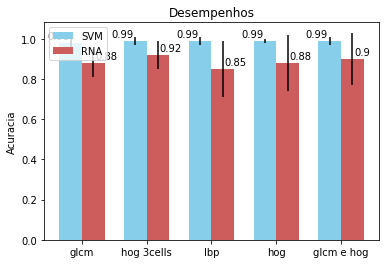

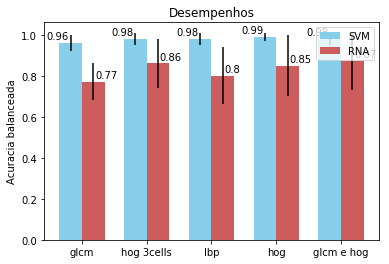

In [14]:
fucoes_extras.grafico(media_SVM, des_SVM, media_RNA, des_RNA, extractor_name, "Acuracia")
fucoes_extras.grafico(mediaB_SVM, desB_SVM, mediaB_RNA, desB_RNA, extractor_name, "Acuracia balanceada")